# Clustering of Wards

This notebook performs clustering of wards using DBSCAN and provides plots of the clusters on the minimap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

from sklearn.cluster import DBSCAN

%matplotlib inline

### Load Data With Offsets Applied

In [2]:
#background image to be used
img = Image.open('maps/map_detailed_723.jpeg')

In [3]:
df_obs = pd.read_csv('df_obs.csv')

#apply translation of coordinates
df_obs['x'] = df_obs['x'] - 64
df_obs['y'] = df_obs['y'] - 64

#convert time to minutes
df_obs['time'] = df_obs['time']/60

df_obs.head()

match_id           start_time  hero_id      time   x    y    z  \
0  5766868635  2021-01-01 08:03:02       27 -1.016667  64   62  128   
1  5766868635  2021-01-01 08:03:02       27  0.650000  28  100  128   
2  5766868635  2021-01-01 08:03:02       27  4.566667  50   64  128   
3  5766868635  2021-01-01 08:03:02       27  4.700000  46   90  130   
4  5766868635  2021-01-01 08:03:02       87  7.600000  78   72  128   

   is_radiant  
0           1  
1           1  
2           1  
3           1  
4           1

In [4]:
df_sen = pd.read_csv('df_sentry.csv')
df_sen['x'] = df_sen['x'] - 64
df_sen['y'] = df_sen['y'] - 64

#convert time to minutes
df_sen['time'] = df_sen['time']/60


df_sen.head()

match_id           start_time  hero_id       time   x   y    z  \
0  5766868635  2021-01-01 08:03:02       27  10.150000  64  62  128   
1  5766868635  2021-01-01 08:03:02       27  26.166667  32  68  130   
2  5766868635  2021-01-01 08:03:02       87   1.516667  92  24  128   
3  5766868635  2021-01-01 08:03:02       87   5.633333  64  58  128   
4  5766868635  2021-01-01 08:03:02       87  10.333333  64  74  128   

   is_radiant  
0           1  
1           1  
2           1  
3           1  
4           1

In [5]:
#colors used in plotting
colors = [
    #'b', 
          #'g', 
          'r', 
          'c', 
          'm', 
          'y', 
          'darkorange', 
          'peru', 
          'gold', 
          'silver', 
          'indigo',
          'navy', 
          'crimson', 
          'darkmagenta', 
          'lime'
         ]

## Function for Clustering Algo

In [6]:
def getLabels(df, eps=3, min_samples=100):
    """
    Returns the labels of a dataframe after dbscan clustering
    
        Parameters
    ----------
    
    df: Pandas dataframe
        Data to be used for fitting. Must have columns 'x' and 'y'
    
    eps : float, default=0.5
        The maximum distance between two samples for one to be considered
        as in the neighborhood of the other. This is not a maximum bound
        on the distances of points within a cluster. This is the most
        important DBSCAN parameter to choose appropriately for your data set
        and distance function.
        
        
    
    """
    #instantiate dbscan
    db = DBSCAN(eps=eps, 
                min_samples=min_samples, 
                metric='euclidean', 
                n_jobs=-1
               )
    
    #fit and predict to data
    db.fit_predict(df[['x', 'y']])
    
    #Returns the sorted unique elements of an array
    labels_unique = np.unique(db.labels_)
    #drop the -1 labels which are unlabeled
    labels_unique = labels_unique[labels_unique != -1]
    
    
    return db.labels_, labels_unique

In [7]:
def populateSubPlot(df,
                    eps=3,
                    min_samples=50,
                    fig=None, 
                    axs=None, 
                    row=None, 
                    col=None,
                    title='Some Ward',
                    img=Image.open('maps/map_detailed_723.jpeg')
                   ):
    
        """
    Populates the subplots to show clustering for each kind
    
        Parameters
    ----------
    
    df: Pandas dataframe
        Data to be used for fitting. Must have columns 'x' and 'y'
    
    eps : float, default=0.5
        The maximum distance between two samples for one to be considered
        as in the neighborhood of the other. This is not a maximum bound
        on the distances of points within a cluster. This is the most
        important DBSCAN parameter to choose appropriately for your data set
        and distance function.
        
    axs: pyplot object, default=None
        Axis of pyplot
        
    fig: pyplot object, default=None
        Figure of subplots
        
    row: integer, default=None
        Row of subplot to be filled
        
    col: integer, default=None
        Column of subplot to be filled
        
    title: string, default=None
        Title of subplot
        
    img: string, default=presaved image
        Image to be filled in background
        
        
        
    
    """
        #assign labels to data and get unique labels
        db_labels, unique_labels = getLabels(df,
                                             eps=eps, 
                                             min_samples=min_samples)
    
        #set the title
        axs[row,col].set_title(title)
        
        #slap image on background
        axs[row,col].imshow(img, extent=[0, 128, 0, 128])

        #for each label and color
        for label, color in zip(unique_labels, colors):
            #places where label matches
            label_arg = np.argwhere(db_labels==label).ravel()
            #reduced version of where labels occur
            df_label_cluster = df.iloc[label_arg]
            #add scatter to plot
            axs[row,col].scatter(df_label_cluster['x'],
                                 df_label_cluster['y'], label=str(label),
                                 color=color)
    
    

In [8]:
def makeQuadSubplots(df_rad_obs, 
                     df_dir_obs, 
                     df_rad_sen, 
                     df_dir_sen, 
                     suptitle='Big title',
                     eps=3, 
                     min_samples=50):
    
    
    """
    Makes 4 subplots and fills each using data from the 4 dataframes.
    
    """
    fig, axs = plt.subplots(2, 2, figsize=(15,15))

    fig.suptitle(suptitle, fontsize=20)

    populateSubPlot(df=df_rad_obs,
                    eps=eps, 
                    min_samples=min_samples,
                    fig=fig, 
                    axs=axs, 
                    row=0, 
                    col=0, title='Obsever Wards Radiant')


    populateSubPlot(df=df_dir_obs, 
                    eps=eps, 
                    min_samples=min_samples,
                    fig=fig, 
                    axs=axs, 
                    row=0, 
                    col=1, title='Obsever Wards Dire')


    populateSubPlot(df=df_rad_sen, 
                    eps=eps, 
                    min_samples=min_samples,
                    fig=fig, 
                    axs=axs, 
                    row=1, 
                    col=0, title='Sentry Wards Radiant')

    populateSubPlot(df=df_dir_sen, 
                    eps=eps, 
                    min_samples=min_samples,
                    fig=fig, 
                    axs=axs, 
                    row=1, 
                    col=1, title='Sentry Wards Dire')

    
    #replace space with underscore for saving
    save_name = suptitle.replace(' ','_').replace(':', '_')
    
    plt.savefig('plots/'+save_name+'.png')
    

## Separate by Team & Ward Type

In [9]:
#separate by team
df_rad_obs = df_obs[(df_obs['is_radiant']==1)]
df_dir_obs = df_obs[(df_obs['is_radiant']==0)]

df_rad_sen = df_sen[(df_sen['is_radiant']==1)]
df_dir_sen = df_sen[(df_sen['is_radiant']==0)]


### Function to Separate by Time

In [10]:
def timeSeparation(df_rad_obs, 
                   df_dir_obs, 
                   df_rad_sen, 
                   df_dir_sen,
                  t1=0,
                  t2=10):
    
    
    df1 = df_rad_obs[(df_rad_obs['time']>t1) & (df_rad_obs['time']<=t2)]
    df2 = df_dir_obs[(df_dir_obs['time']>t1) & (df_dir_obs['time']<=t2)]
    df3 = df_rad_sen[(df_rad_sen['time']>t1) & (df_rad_sen['time']<=t2)]
    df4 = df_dir_sen[(df_dir_sen['time']>t1) & (df_dir_sen['time']<=t2)]
    
    
    return df1, df2, df3, df4 

### Pre-Game - Before Minute 0:00

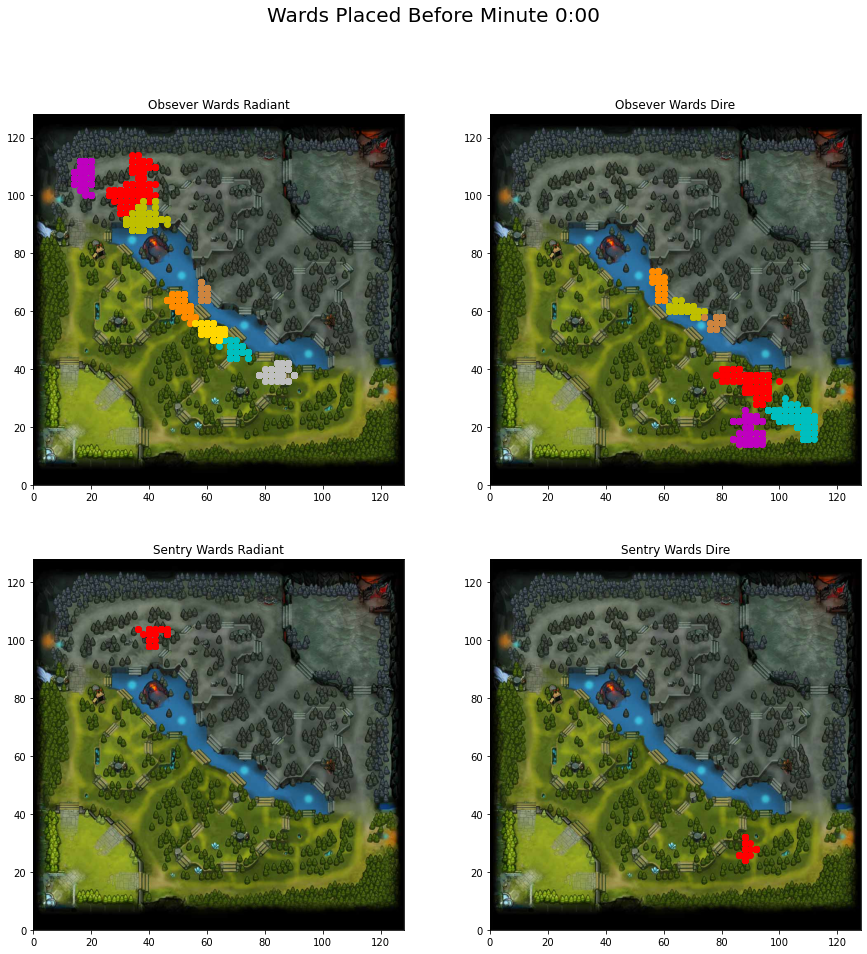

In [11]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=-100,
                                    t2=0)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4,
                 eps=4, 
                 min_samples=200,
                 suptitle='Wards Placed Before Minute 0:00')

### Early Game -  0:00 to 10:00

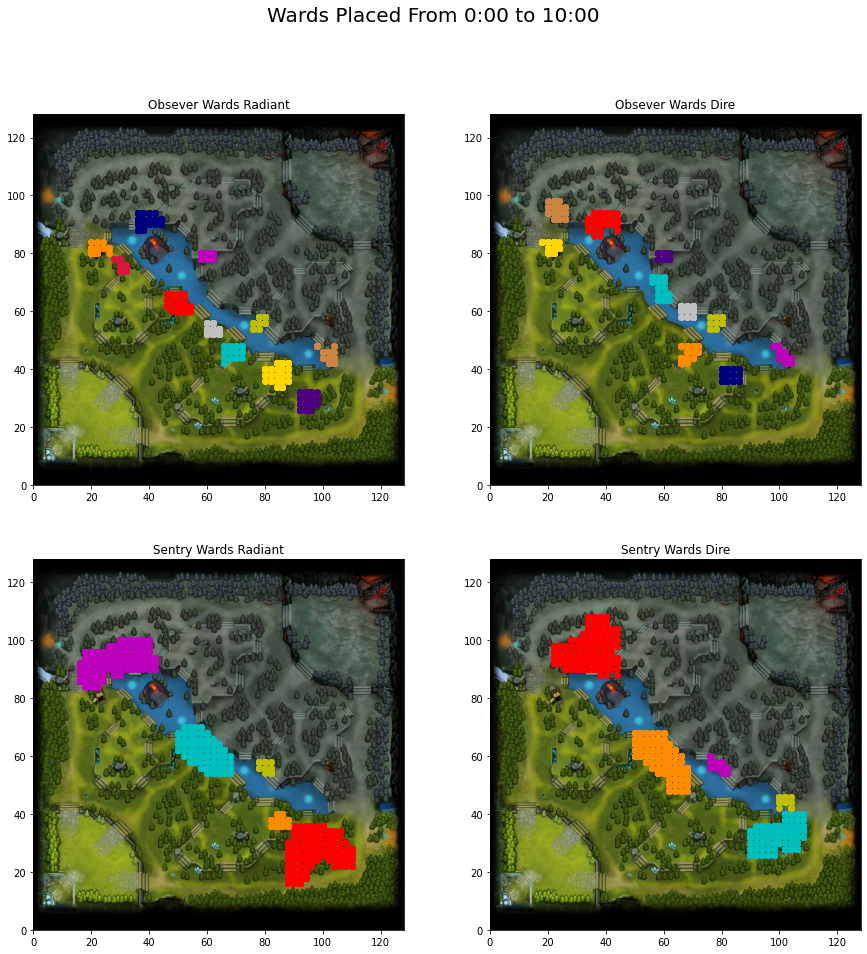

In [12]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=0,
                                    t2=10)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 0:00 to 10:00',
                 eps=3, 
                 min_samples=500)

### Early to Mid Game -  10:00 to 20:00

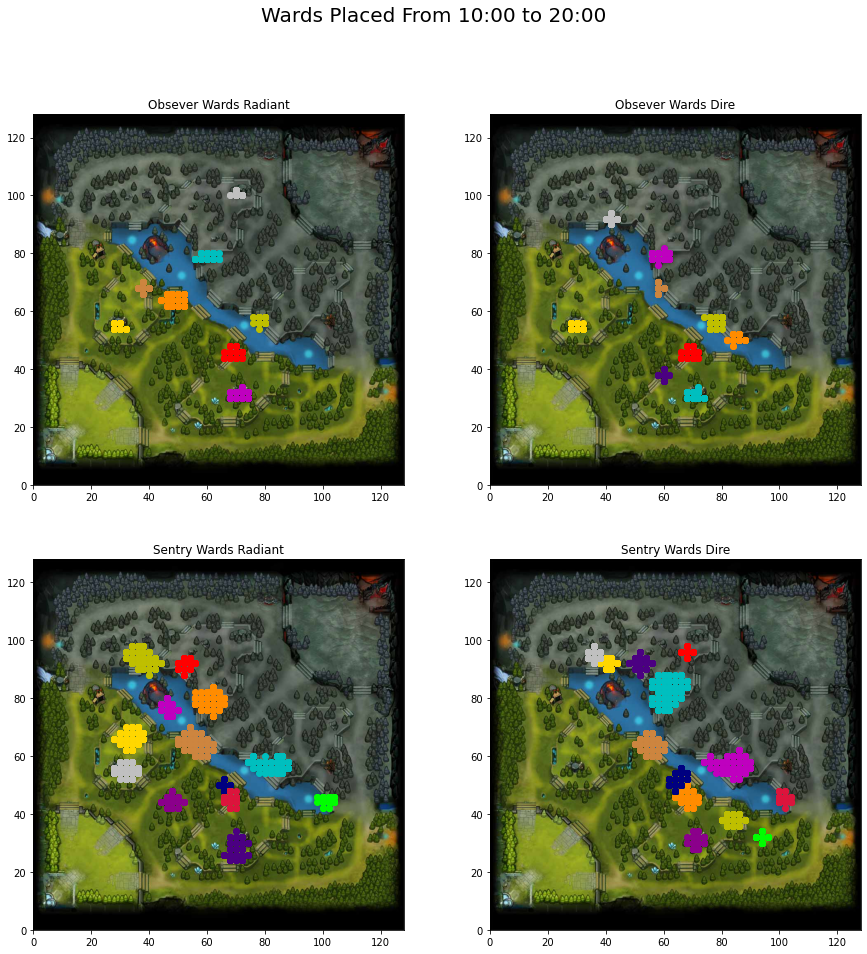

In [13]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=10,
                                    t2=20)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 10:00 to 20:00',
                 eps=2, 
                 min_samples=500)

### Mid Game - 20:00 to 30:00

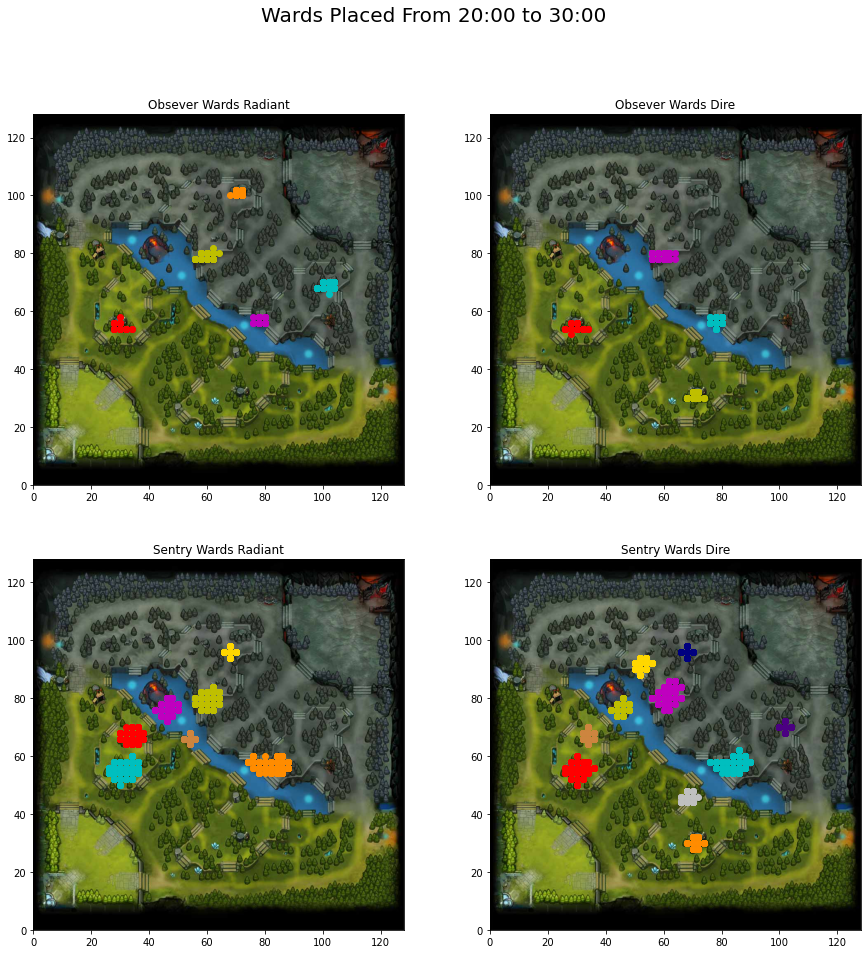

In [14]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=20,
                                    t2=30)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 20:00 to 30:00',
                 eps=2, 
                 min_samples=500)

### Mid to Late Game - 30:00 to 40:00

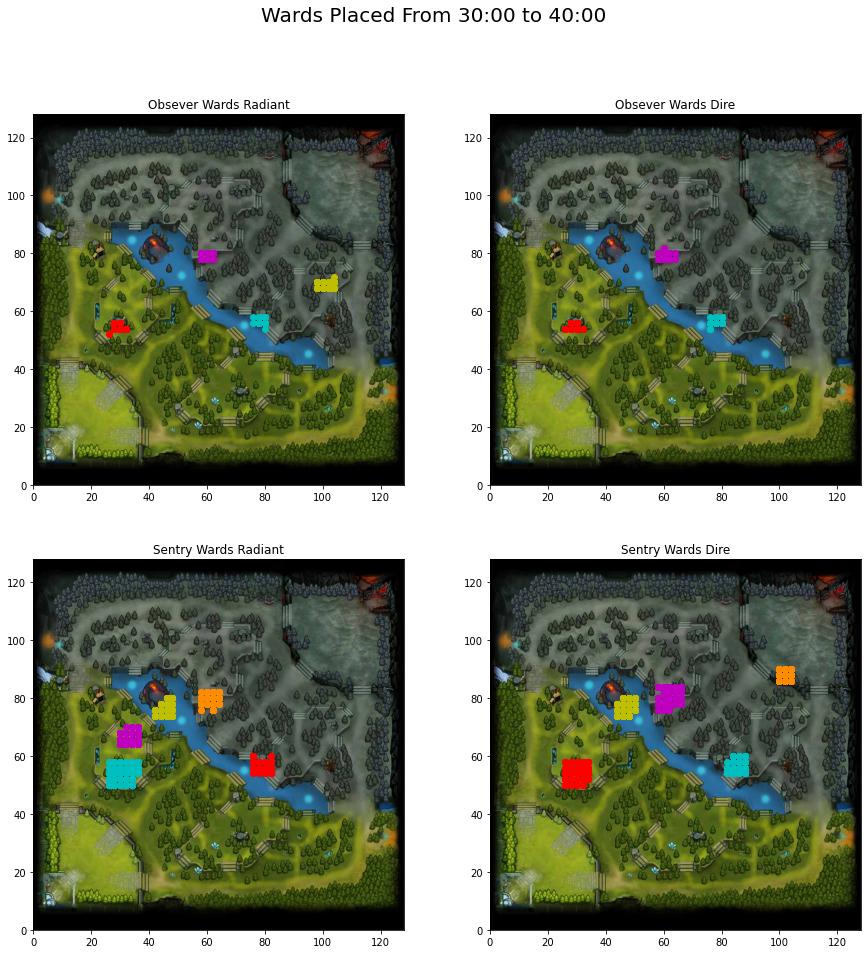

In [15]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=30,
                                    t2=40)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 30:00 to 40:00',
                 eps=3, 
                 min_samples=500)

### Late Game - 40:00 to 60:00

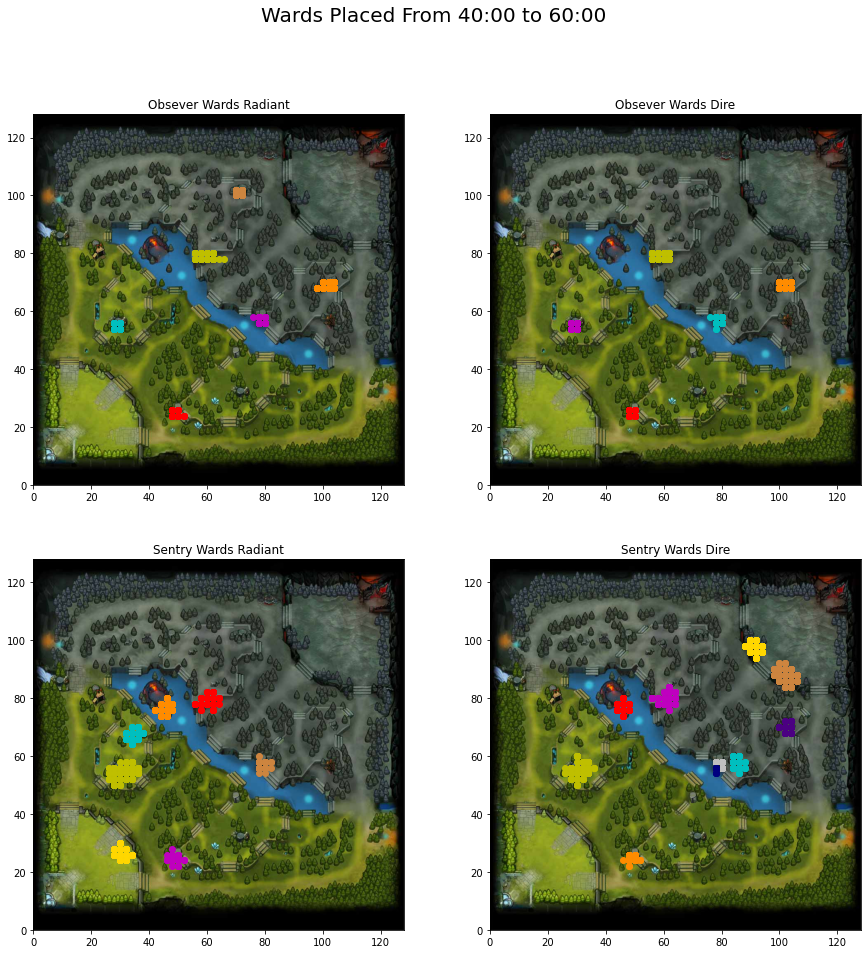

In [16]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=40,
                                    t2=60)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 40:00 to 60:00',
                 eps=2, 
                 min_samples=100)

### Very Late Game - 60:00 and Beyond

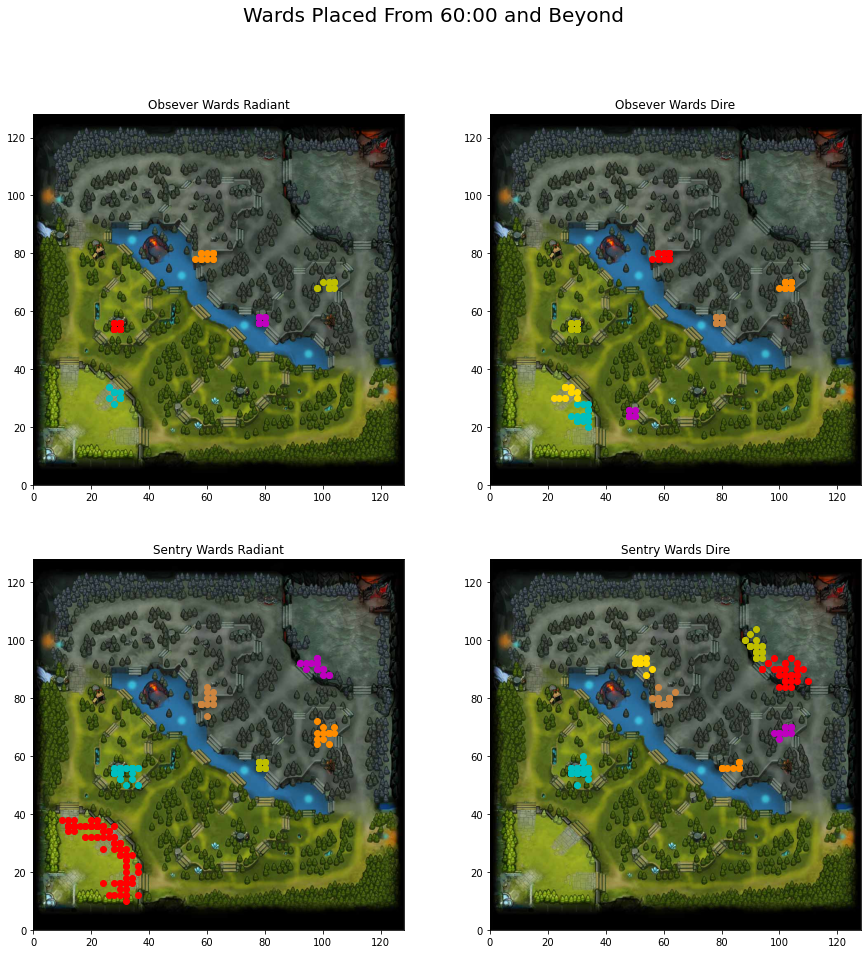

In [17]:
df1, df2, df3, df4 = timeSeparation(df_rad_obs, 
                                    df_dir_obs, 
                                    df_rad_sen, 
                                    df_dir_sen,
                                    t1=60,
                                    t2=200)

makeQuadSubplots(df1,
                 df2, 
                 df3, 
                 df4, 
                 suptitle='Wards Placed From 60:00 and Beyond',
                 eps=4, 
                 min_samples=10)